In [1]:
from cobalt_tractography.bossHandler import *
from cobalt_tractography.tractography import *
import numpy as np
from skimage import img_as_uint


In [2]:
# Parameters:
coll_name = 'ailey-dev'
exp_name = 'DRN-BLA_2378'
chan_name = 'Ch0'
x_rng = [9250, 9750]
y_rng = [18000, 18500]
z_rng = [500, 600]
test_lbl = '4'

# Using bossHandler class to download from Boss:
bHandler = bossHandler(coll_name)
bHandler.select_experiment(exp_name)
exp = bHandler.get_experiment()
bHandler.select_channel(chan_name)
data_cutout_raw = bHandler.get_cutout(x_rng, y_rng, z_rng)
data_cutout_raw = np.transpose(img_as_uint(data_cutout_raw),(1,2,0))

In [3]:
th = tractoHandler(data_cutout_raw)
skeleton, concomp, concomp_col, data_cutout_binarized =th.run_tractography(1)

slice-by-slice with subsampling


/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Visualize (animated)
Visualize as an animation iterating through z slices

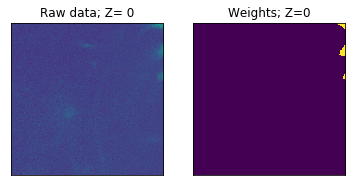

In [4]:
# Visualize the output (animation)

from matplotlib import animation
from IPython.display import HTML

z_rng = [0 , data_cutout_raw.shape[2]]
# z_rng = [70,80]
fig, (im1, im2) = plt.subplots(1, 2)

# fig.set_facecolor('black')
ax1 = im1.imshow(data_cutout_raw[:,:,0], animated=True)
ax2 = im2.imshow(data_cutout_binarized[:,:,0], animated=True)

im1.get_xaxis().set_visible(False)
im2.get_xaxis().set_visible(False)

im1.get_yaxis().set_visible(False)
im2.get_yaxis().set_visible(False)

im1.set_title('Raw data')
im2.set_title('Weights')

def animate(i):
    ax1.set_data(data_cutout_raw[:,:,i])
    im1.set_title('Raw data; Z= ' + str(i))
#     ax1.set_cmap('gray')
    ax1.autoscale()
    
    ax2.set_data(data_cutout_binarized[:,:,i])
    im2.set_title('Weights; Z=' + str(i))
#     ax2.set_cmap('gray')
    ax2.autoscale()
    return ax1

anim = animation.FuncAnimation(fig, animate, frames = np.arange(z_rng[0],z_rng[1]), interval = 50)
HTML(anim.to_jshtml())
